# Weitergabe der lokalen Informationen an das Level-1 Modell mittels Weitergabe der X-Werte

In [1]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline
import sklearn
import re

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score;
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import make_scorer;
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state
from IPython.display import display, Math, Latex,Markdown # rendering latex formula in code output

from dataclasses import dataclass
from sklearn.preprocessing import StandardScaler 


plt.style.use('ggplot')

plt.rcParams.update({'savefig.dpi': 75})
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams.update({'axes.labelsize': 18})
plt.rcParams.update({'axes.titlesize': 30})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'lines.markersize': 8})
plt.rcParams.update({'legend.fontsize': 14})
plt.rcParams.update({'text.usetex': True})
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['savefig.dpi'] = 200


plt.rcParams['font.serif'] = "cm"

Seed the random generator

In [2]:
RANDOM_STATE=24041329
np.random.seed(RANDOM_STATE)

# Dieses Notebook versucht Lokalität mittels eines pseudo Modell zu erzeugen, welches die X information ans Level-1 Modell weitergibt 

definition des pseudo Modells

In [3]:
class PredictX(BaseEstimator, RegressorMixin, TransformerMixin):

    # we skip this step because training this model is not needed
    def fit(self, X, y):
        self.yshape = y.shape
        return self

    # just return the X as our prediction 
    def predict(self, X):
        if len(self.yshape) > 1:
            return X.reshape(X.shape[0],self.yshape[1])
        else:
            return X.reshape(X.shape[0])

import der Funktionen und des Stacking Models

In [4]:
%run "functions/functions.ipynb"

In [5]:
%run "visualisation/visualisation_functions.ipynb"

In [6]:
%run "models/stacking_model.ipynb"

negativer rmse hinzufügen 

In [7]:
def score_rmse(y, y_pred, **kwargs):
    return np.sqrt(mean_squared_error(y, y_pred))

neg_rmse_score = make_scorer(score_rmse,greater_is_better=False)

scores = {"r2":'r2', "neg-rmse": neg_rmse_score}

Verschiedene Stacking Modelle erstellen

In [8]:
linearReg = LinearRegression()
randomForrest = RandomForestRegressor(n_estimators=10)
kNeighbors = KNeighborsRegressor(n_neighbors=5)
dTree = DecisionTreeRegressor() 
predict_x = PredictX()

two_newline= r'\newline'*2 # makro for adding two \newline commands
#two_newline="\n "
stacking_model_list =np.array([
    (StackingAveragedModels(base_models=[linearReg,randomForrest,kNeighbors],
                            meta_model=linearReg,
                            n_folds=5),
     
     f''' Id:0 {two_newline} 
     level 0: Lineare Regression, RandomForrest, K Neighbors {two_newline} 
     level 1: Lineare Regression'''),
    
    
    (StackingAveragedModels(base_models=[linearReg,randomForrest,kNeighbors,predict_x],
                            meta_model=linearReg,
                            n_folds=5),
     
     f''' Id:1 {two_newline} 
     level 0: Lineare Regression, RandomForrest, K Neighbors, Predict X {two_newline} 
     level 1: Lineare Regression'''),
    
    
   (StackingAveragedModels(base_models=[linearReg,randomForrest,kNeighbors,predict_x],
                           meta_model= dTree,
                           n_folds=5),
    
    f''' Id:2 {two_newline} 
    level 0: Lineare Regression, RandomForrest, K Neighbors, Predict X {two_newline} 
    level 1: DecisionTree'''),
   
    
    
    
     (StackingAveragedModels(base_models=[linearReg,randomForrest],
                             meta_model=linearReg,
                             n_folds=5),
     
     f''' Id:3 {two_newline} 
     level 0: Lineare Regression, RandomForrest {two_newline} 
     level 1: Lineare Regression'''),
    
    
    
     (StackingAveragedModels(base_models=[linearReg,randomForrest,predict_x],
                             meta_model=linearReg,
                             n_folds=5),
     
     f''' Id:4 {two_newline} 
     level 0: Lineare Regression, RandomForrest, Predict X {two_newline} 
     level 1: Lineare Regression'''),
    
    (StackingAveragedModels(base_models=[linearReg,randomForrest,predict_x],
                            meta_model=dTree,
                            n_folds=5),
          
    f''' Id:5 {two_newline} 
    level 0: Lineare Regression, RandomForrest, Predict X {two_newline} 
    level 1: DecisionTree'''),
    
    
])

# Ausführung des Experiments Vergleich der R2 und negativen RMSE Werte

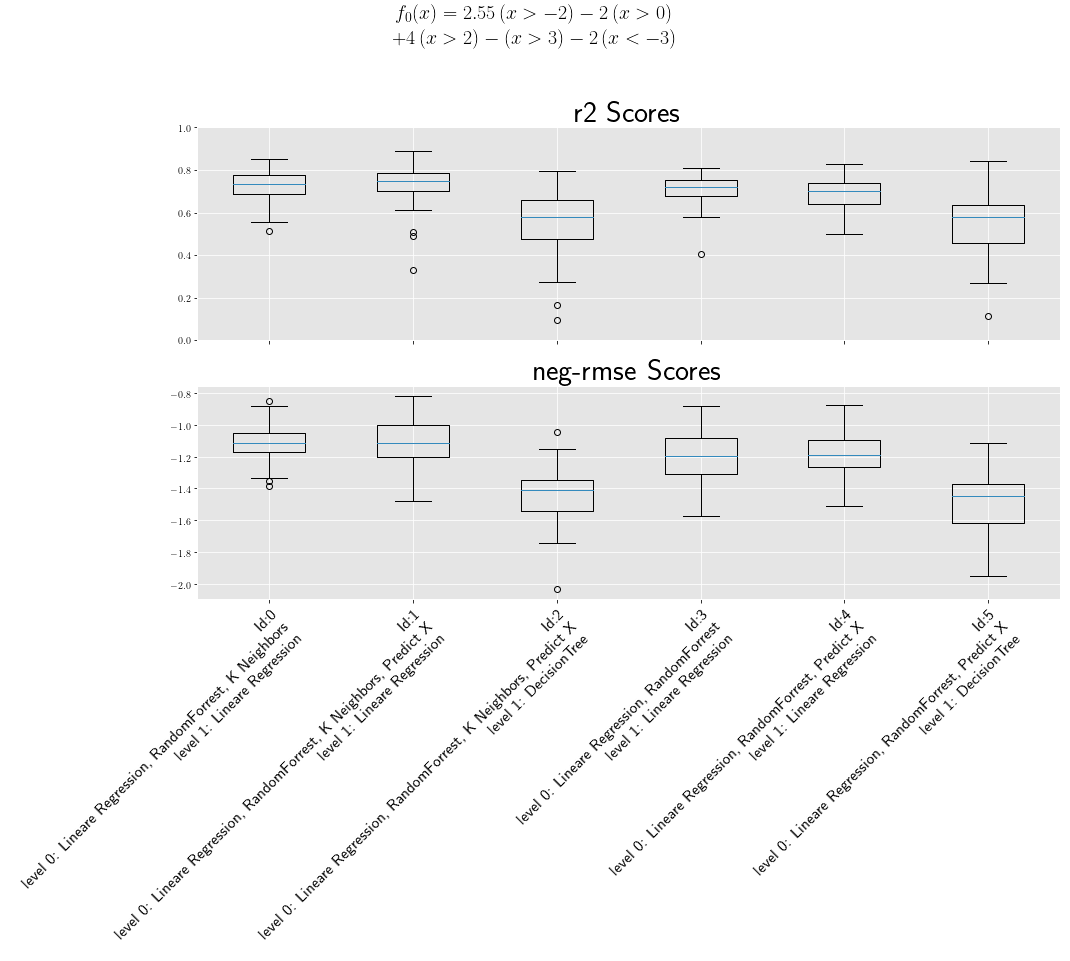

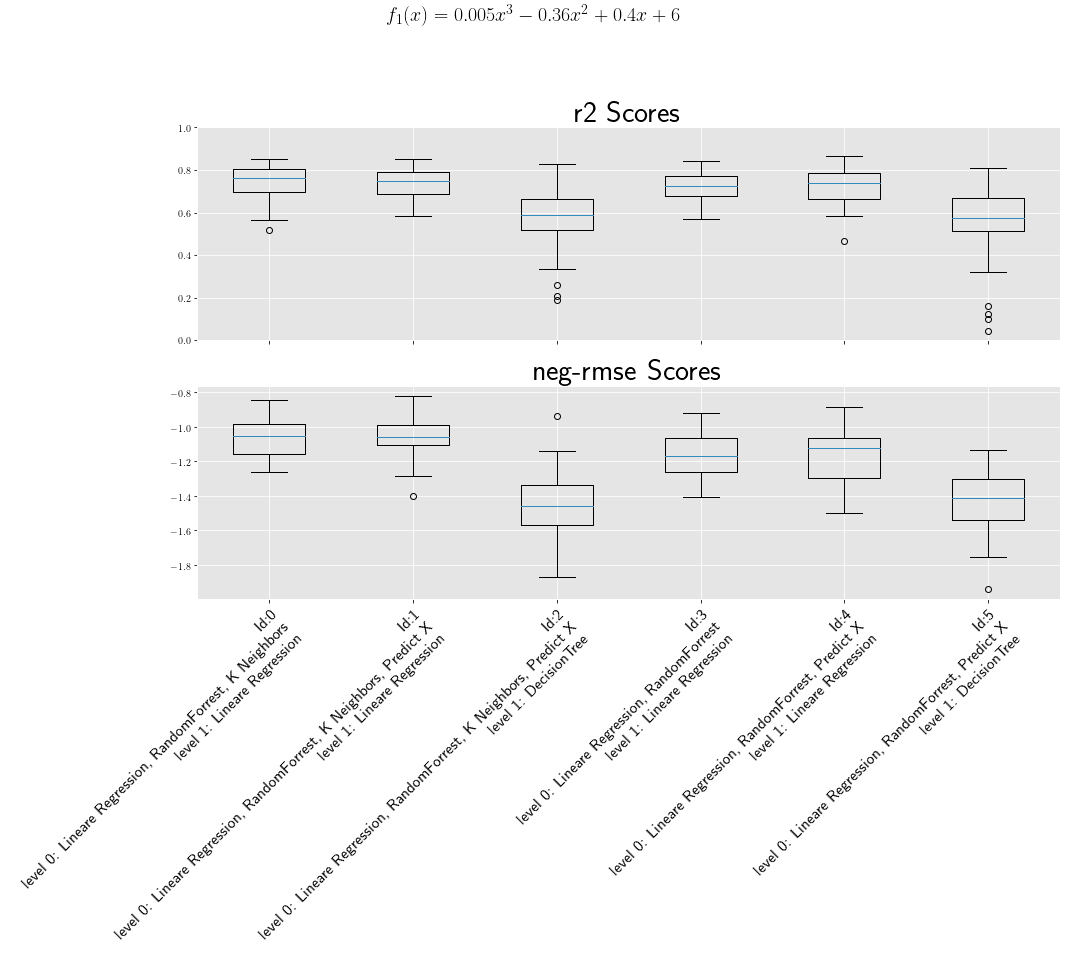

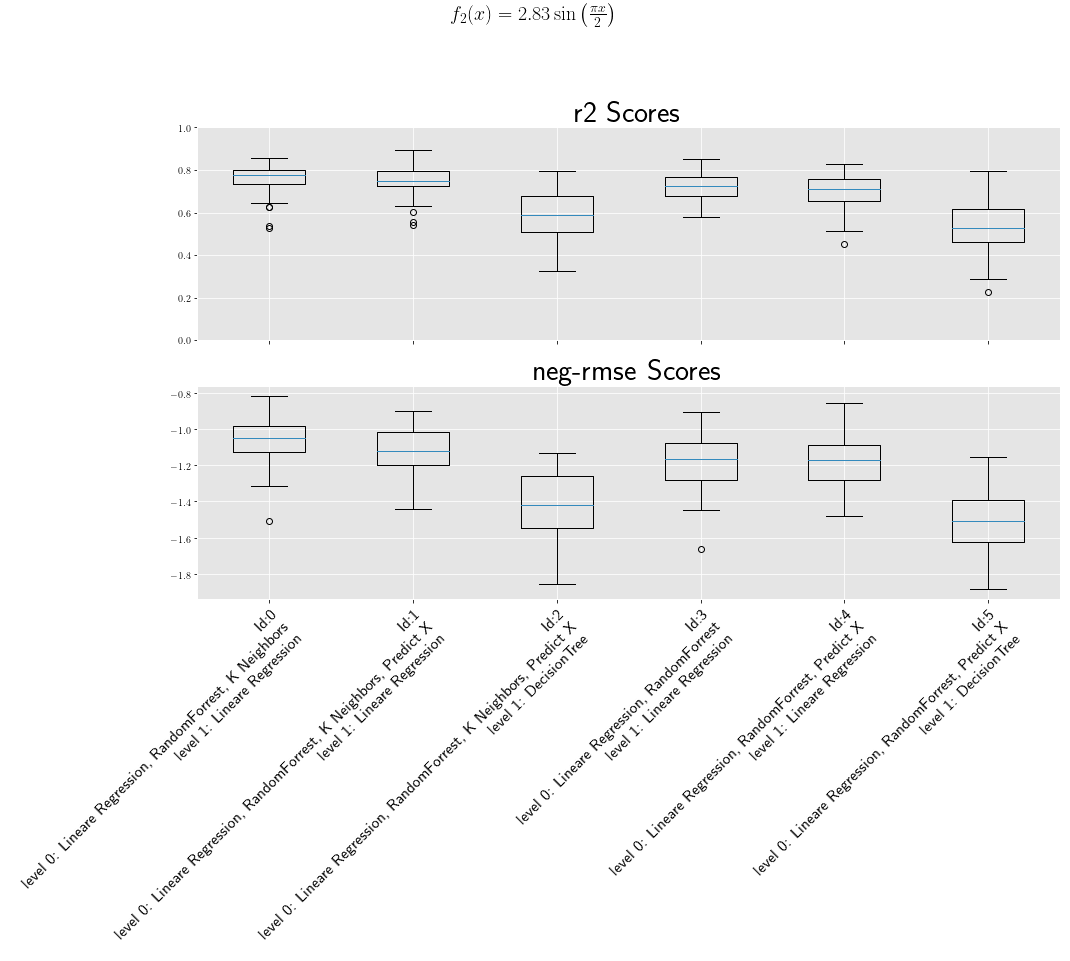

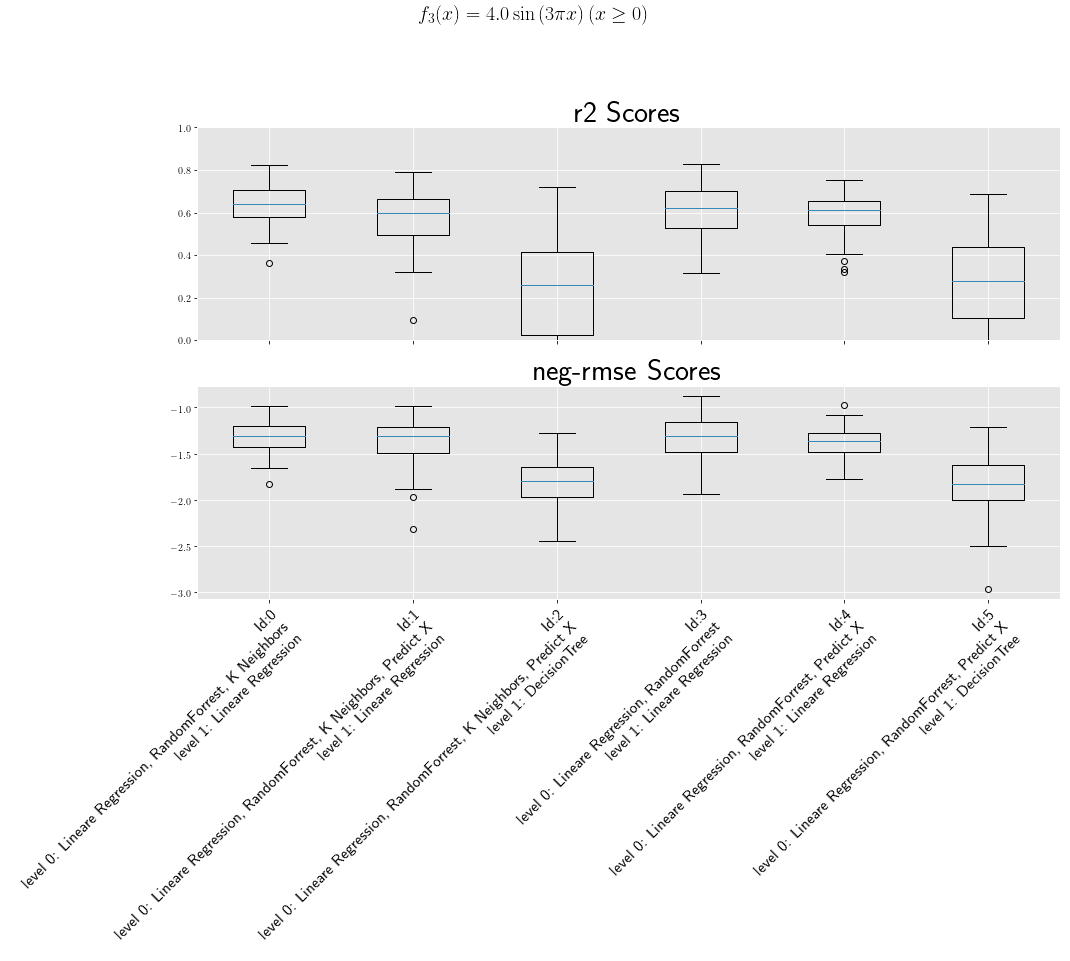

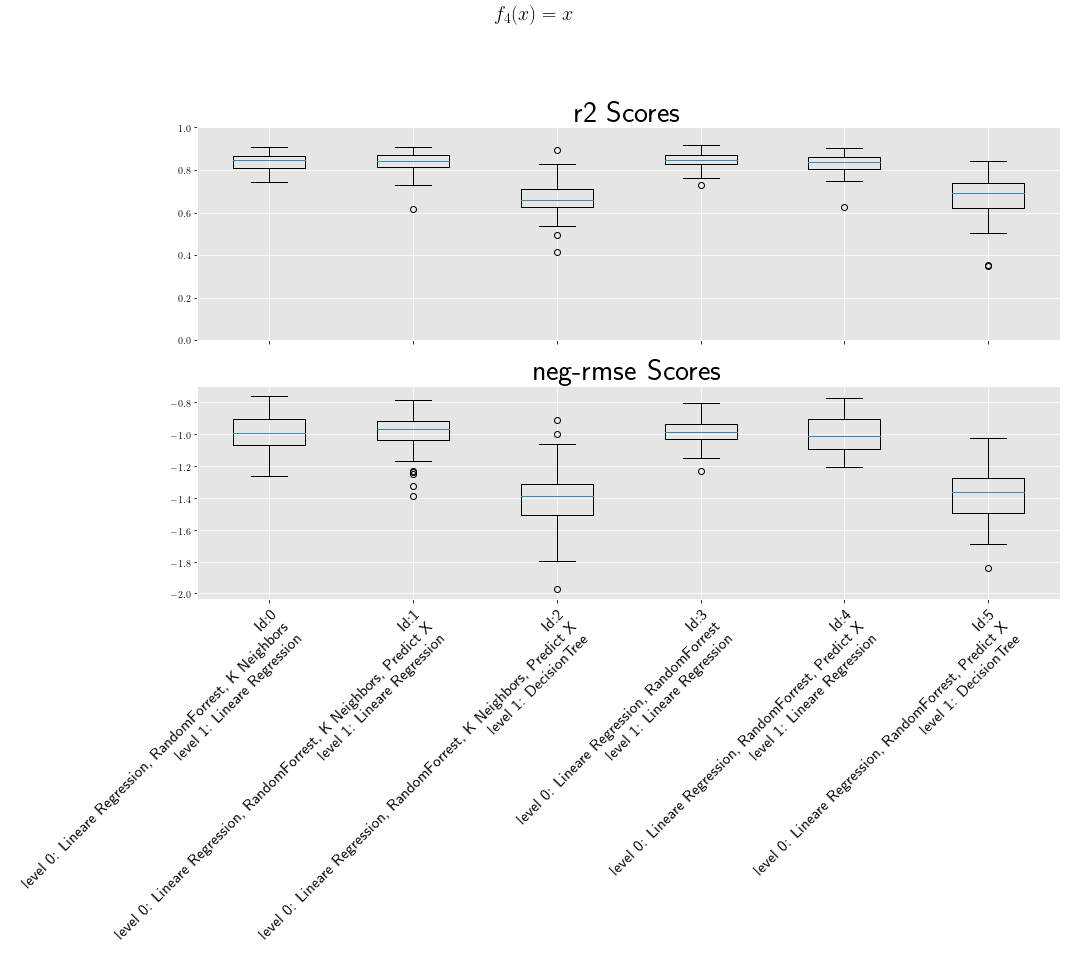

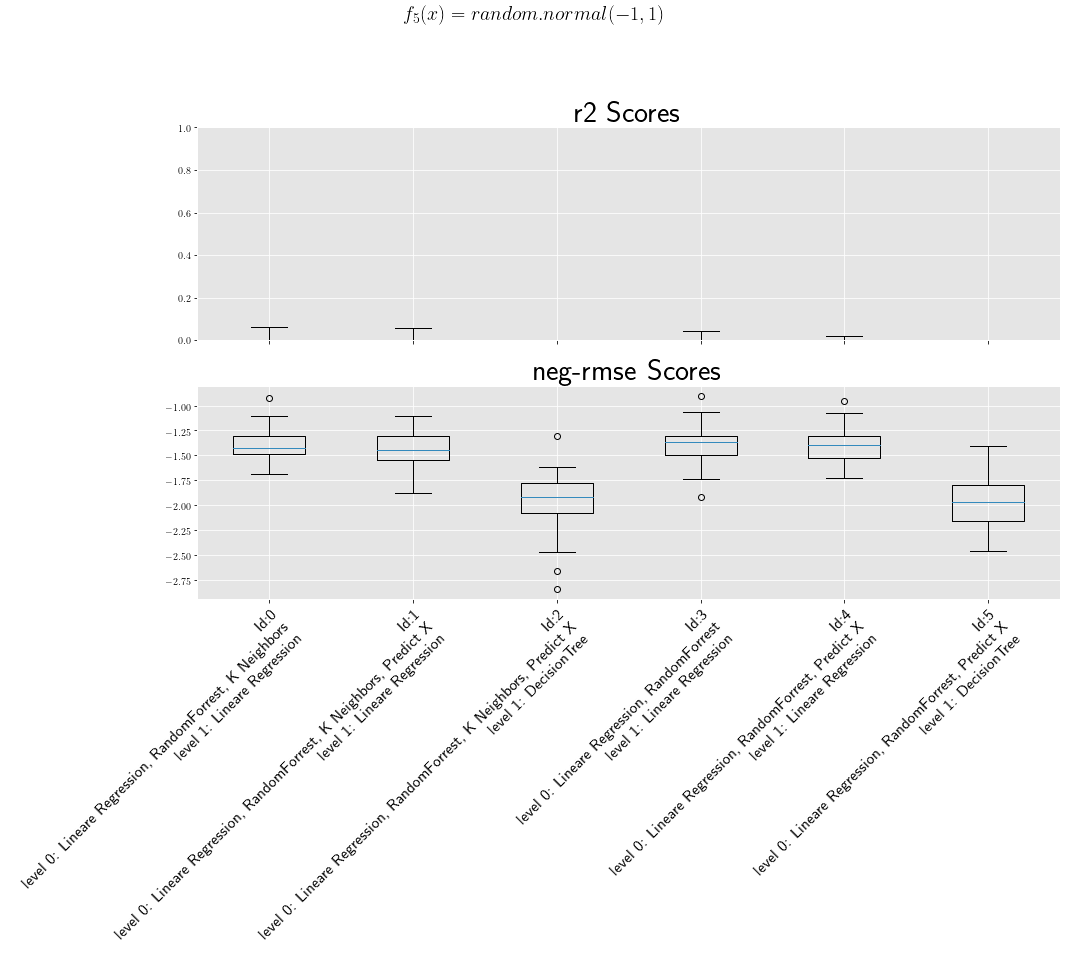

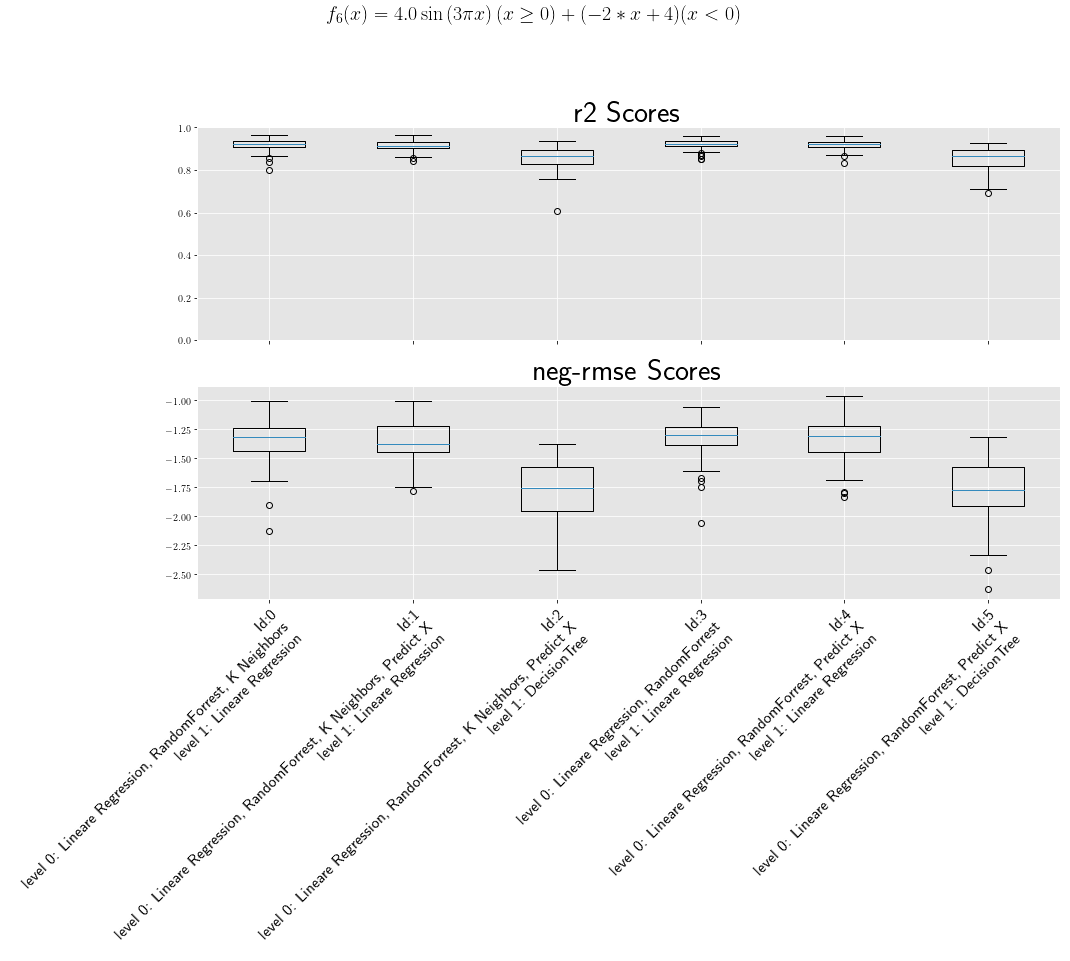

r2 [[ 0.72635642  0.74699081  0.75841947  0.6388121   0.83969867 -0.05576202
   0.9159495 ]
 [ 0.72721456  0.73925989  0.74804818  0.57081937  0.83354004 -0.04680293
   0.91464698]
 [ 0.56456443  0.56826078  0.57668624  0.19137895  0.66891131 -1.03867472
   0.85520733]
 [ 0.70754459  0.72125301  0.71961481  0.60027449  0.84466104 -0.05849815
   0.91989954]
 [ 0.69074569  0.72490104  0.69902954  0.58969438  0.83115201 -0.04096004
   0.91919698]
 [ 0.54728029  0.55308321  0.52553835  0.25733972  0.6727142  -1.07125444
   0.85547634]]


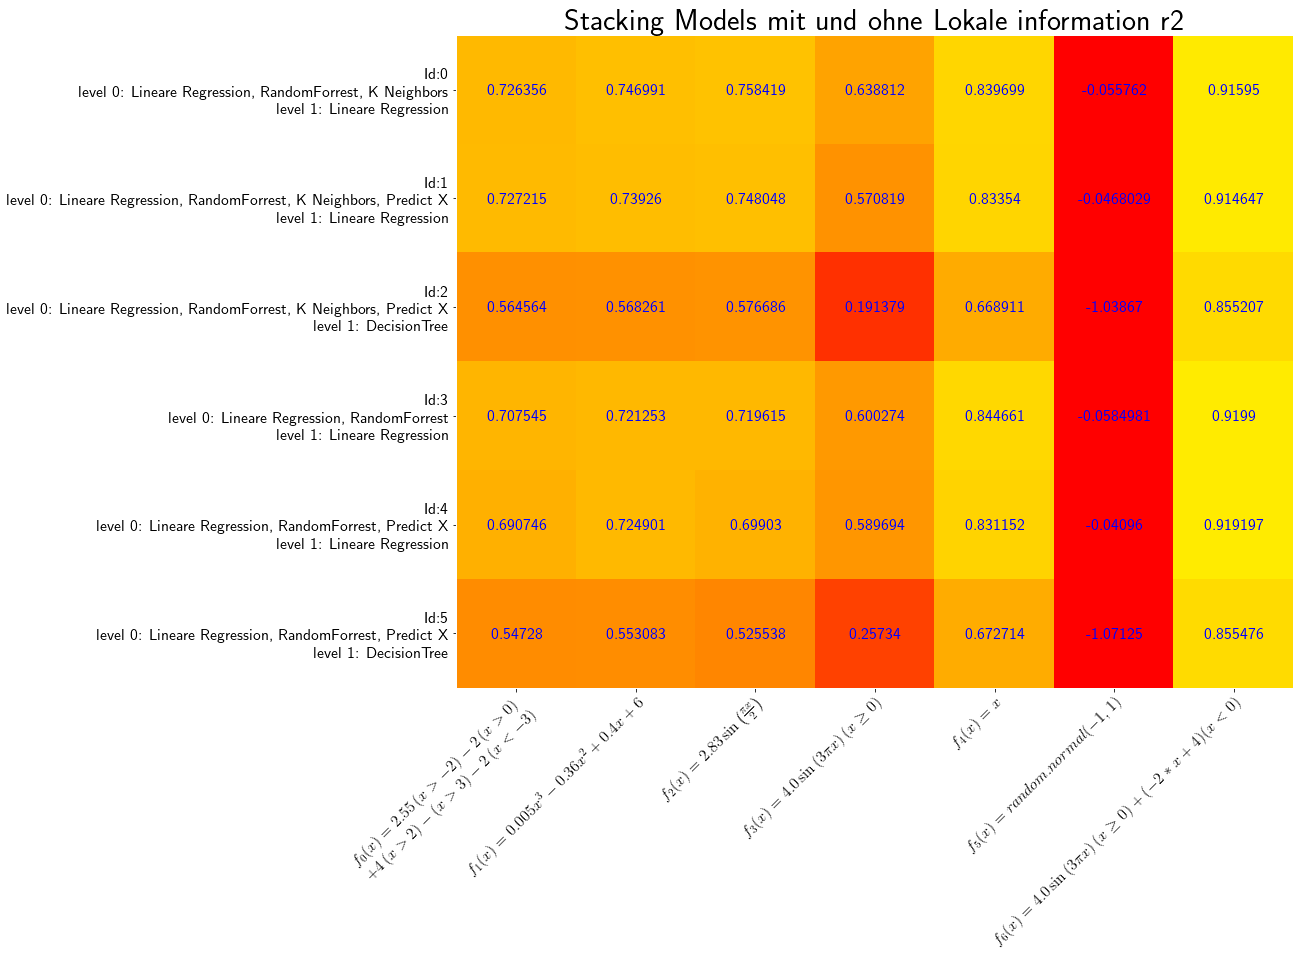

neg-rmse [[-1.11183611 -1.06701741 -1.06296078 -1.31492593 -0.98416307 -1.40269875
  -1.35908257]
 [-1.11047193 -1.06620469 -1.11145655 -1.37068339 -0.99105525 -1.44330567
  -1.36107338]
 [-1.43677584 -1.449618   -1.41658447 -1.81438537 -1.40395123 -1.94912271
  -1.79895605]
 [-1.19478076 -1.16928909 -1.17305538 -1.33137839 -0.98433579 -1.39651414
  -1.34021578]
 [-1.18915258 -1.16257102 -1.18209385 -1.37581059 -0.99627026 -1.41166129
  -1.33101149]
 [-1.49138483 -1.43043122 -1.49435997 -1.85773343 -1.37479296 -1.9614617
  -1.79721317]]


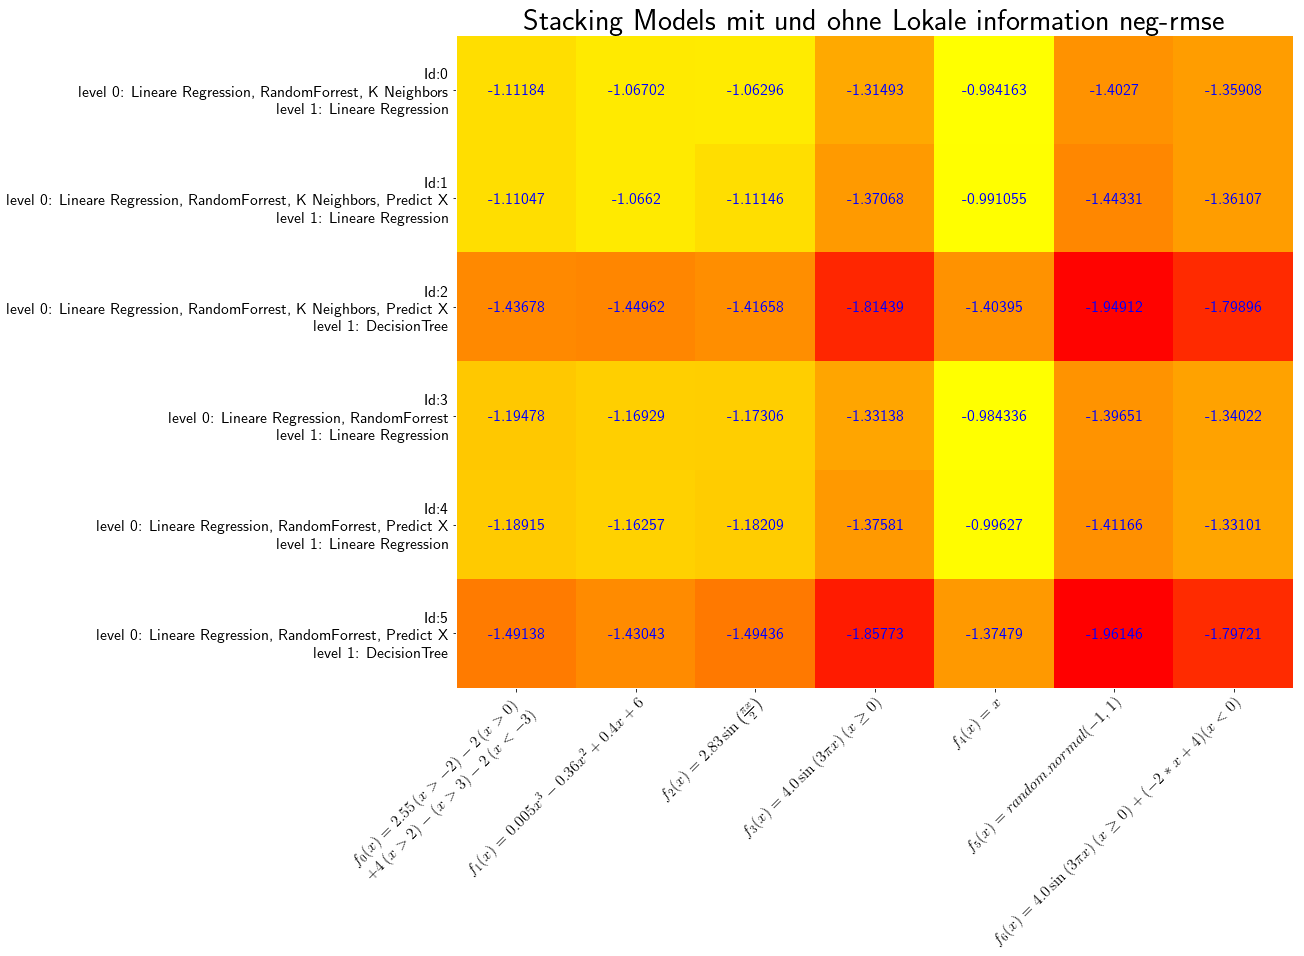

In [9]:
def score_rmse(y, y_pred, **kwargs):
    return np.sqrt(mean_squared_error(y, y_pred))

neg_rmse_score = make_scorer(score_rmse,greater_is_better=False)

scores = {"r2":'r2', "neg-rmse": neg_rmse_score}
scores_range = [(0,1),(None,None)]# r2 is from 1 to 0 and neg-rmse is from 0 to 2.7 to make the matrix more comparable to the one above

compare_models(stacking_model_list,function_list,scores,score_ranges=scores_range,title="Stacking Models mit und ohne Lokale information")
print()